   # Project for Big Data Management and Visualization - 2023
     Kaftantzis Savvas - aivc22007
     Dataset: Predict Heart Disease with Logistic Regression
     URL: https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression?select=framingham.csv

In [1]:
# The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).
# The dataset provides the patients’ information. It includes over 4.238 records and 15 attributes.
# Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.
# For CHD (10 year risk of coronary heart disease): '1' means 'Yes', '0' means 'No'.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('dataset.csv')  # Import the csv File, using 'read_csv' Function from pandas Library

In [18]:
df.head()  # Check the Head (First 5 rows)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [19]:
df.shape   # Number of Rows and Columns

(4238, 16)

In [20]:
df.info()  # Information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [21]:
df.describe().transpose() # Returns a summarized statistics of the series

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


In [22]:
# Check if we have got null values
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<Axes: >

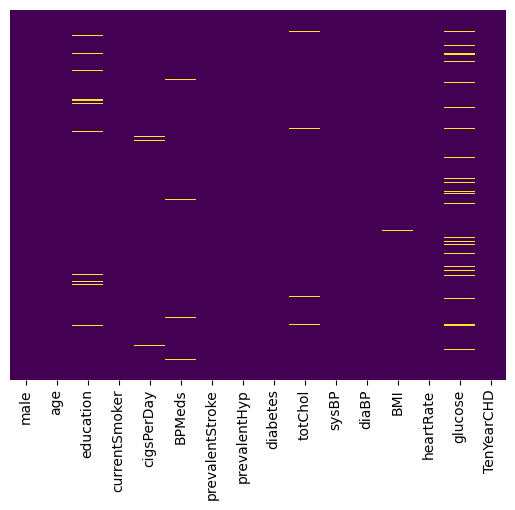

In [23]:
# Let's Visualize it, just to have it in a plot. 
# The most NA Values are in 'glucose' column.
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

.

# We will let the missing values as it is and we won't use the average of the values in each column or anything else, but leave them as they are and run the algorithms with the exact data we have. Τhis means that we will have to use some methods so that the algorithms run correctly, as we will see below.

.

# Visualizations

Let's continue on by visualizing some more of the data to se more info about them!

<Axes: title={'center': 'Gender'}, xlabel='male', ylabel='count'>

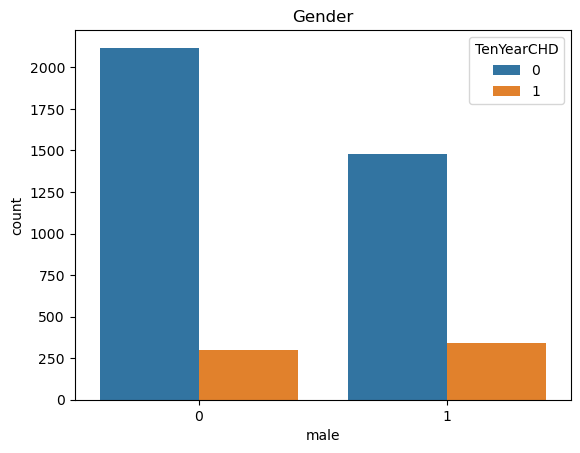

In [24]:
plt.title('Gender')
sns.countplot(data=df,x='male',hue='TenYearCHD')

We can see that we have a larger number of women who don't have heart disease, than men.

<Axes: title={'center': 'Whether or not the patient had previously had a stroke'}, xlabel='prevalentStroke', ylabel='count'>

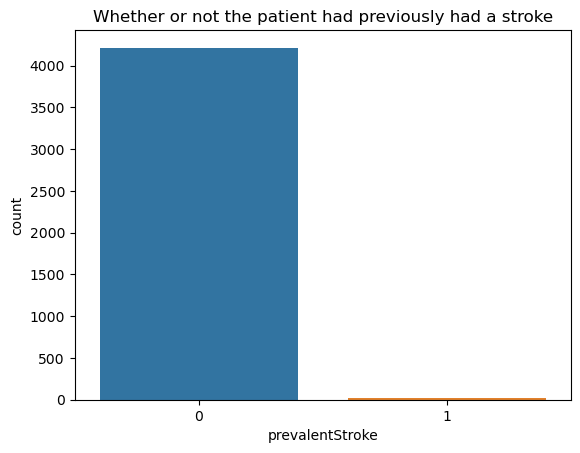

In [25]:
plt.title('Whether or not the patient had previously had a stroke')
sns.countplot(data=df,x='prevalentStroke')

So we mainly got, non stroke patients.

<Axes: title={'center': 'CHD by Age'}, xlabel='age', ylabel='count'>

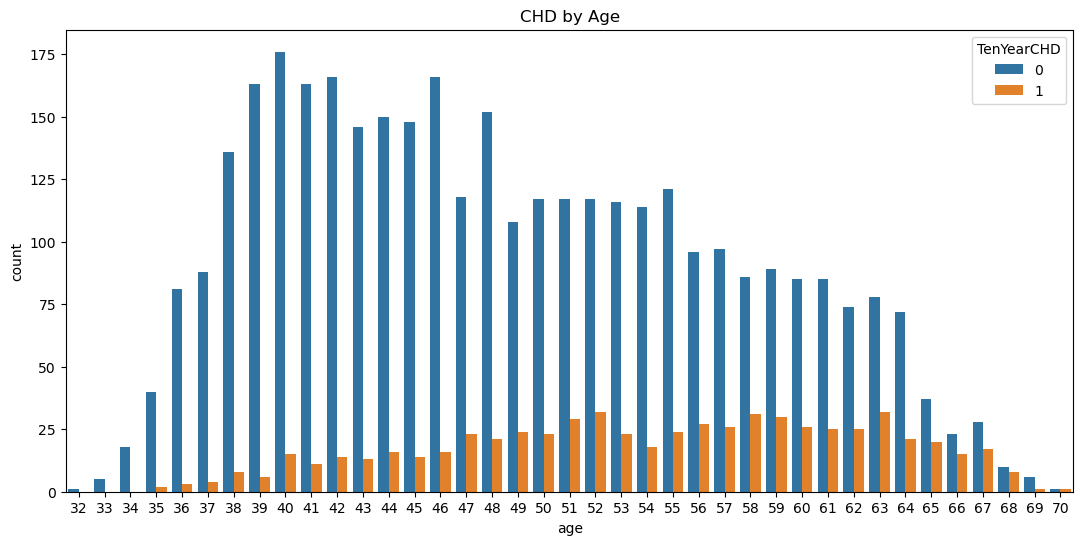

In [26]:
plt.figure(figsize=(13,6))
plt.title('CHD by Age')
sns.countplot(data=df,x='age',hue='TenYearCHD')

The age is between 32 and 70 year's old. And we can take a look in statistics by age

<Axes: title={'center': 'CHD by Hypertensive'}, xlabel='prevalentHyp', ylabel='count'>

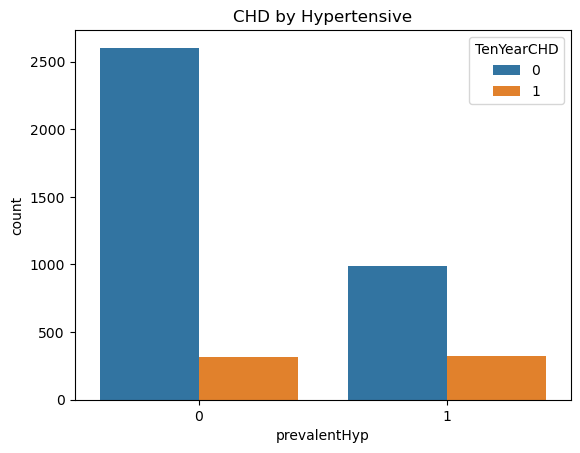

In [27]:
plt.title('CHD by Hypertensive')
sns.countplot(data=df,x='prevalentHyp',hue='TenYearCHD')

<Axes: title={'center': 'The number of cigarettes that the person smoked on average in one day'}, xlabel='count', ylabel='cigsPerDay'>

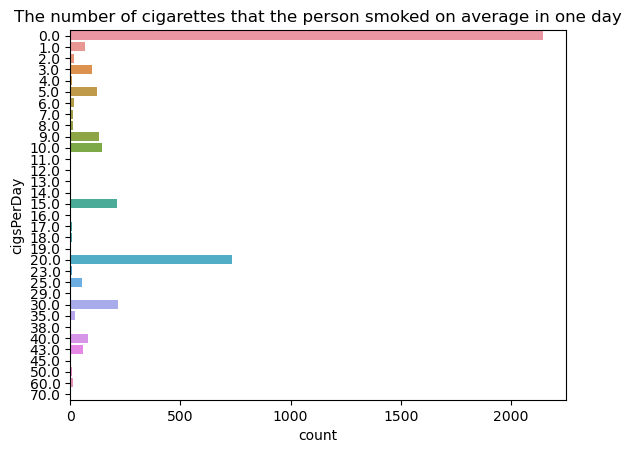

In [28]:
plt.title('The number of cigarettes that the person smoked on average in one day')
sns.countplot(data=df,y='cigsPerDay')

So we see that the patients basically either don't smoke any cigarettes, or smoke 15-20 cigarettes a day.

<Axes: title={'center': 'Whether or not the patient had diabetes and CHD'}, xlabel='diabetes', ylabel='count'>

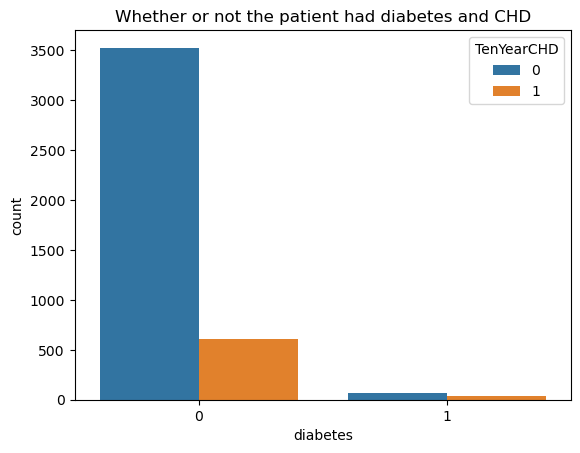

In [29]:
plt.title('Whether or not the patient had diabetes and CHD')
sns.countplot(data=df,x='diabetes',hue='TenYearCHD')

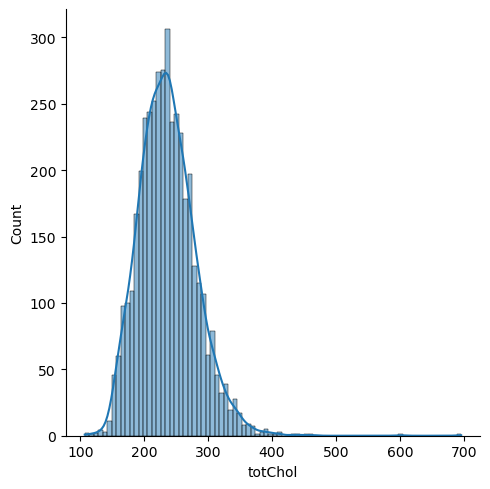

In [30]:
df['totChol'].mean()
sns.displot(x='totChol',data=df,kde=True)

<Axes: title={'center': '10 year risk of coronary heart disease CHD (1=Yes/0=No)'}, xlabel='TenYearCHD', ylabel='count'>

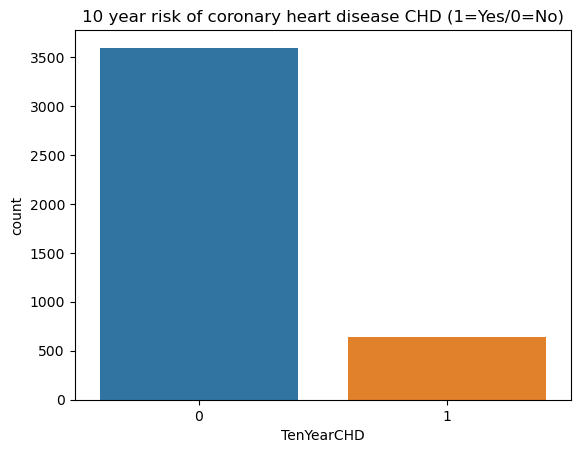

In [31]:
plt.title('10 year risk of coronary heart disease CHD (1=Yes/0=No)')
sns.countplot(data=df,x='TenYearCHD')

We have a bigger team that they don't have CHD.

# Correlation

In [32]:
# This method calculates the relationship between each column in our data set.

df.corr()['TenYearCHD'][:-1].sort_values(ascending=False)

age                0.225256
sysBP              0.216429
prevalentHyp       0.177603
diaBP              0.145299
glucose            0.125544
diabetes           0.097317
male               0.088428
BPMeds             0.087489
totChol            0.082184
BMI                0.075192
prevalentStroke    0.061810
cigsPerDay         0.057884
heartRate          0.022913
currentSmoker      0.019456
education         -0.054059
Name: TenYearCHD, dtype: float64

<Axes: >

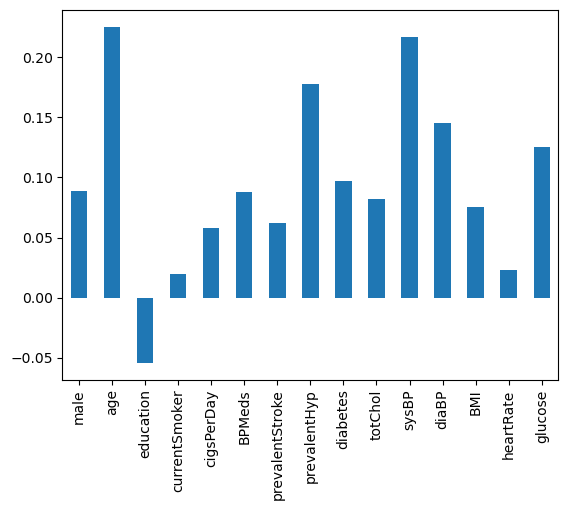

In [33]:
#Plot this correlation
df.corr()['TenYearCHD'][:-1].plot(kind='bar')

.

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set. (We have Binary logistic regression)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# y is the value we want to make the prediction
X = df.drop('TenYearCHD',axis=1) # independent variables  
y = df['TenYearCHD']             # dependent variable

In [36]:
# We split the data into random training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [38]:
# Imputer for completing missing values with simple strategies
# We select a strategy to ignore missing values

imputer = SimpleImputer(strategy='constant', fill_value=None) 

Fit and transform the training set

In [39]:
X_train_imputed = imputer.fit_transform(X_train)

In [40]:
X_test_imputed = imputer.transform(X_test)

Train and fit a logistic regression model on the training set

In [41]:
# Because i got warning message 
#'You received indicates that the logistic regression model reached the maximum number of iterations before convergence'
# I will Increase the maximum number of iterations and
# Try a different solver
# I will choose 'liblinear' which is a linear classifier for large-scale machine learning tasks.

log = LogisticRegression(max_iter=1000,solver='liblinear')  

In [42]:
log.fit(X_train_imputed,y_train) # The fit() method trains the logistic regression model on the provided training data, 
                                 # learning the optimal coefficients that minimize the logistic loss function.

LogisticRegression(max_iter=1000, solver='liblinear')

Now predict values for the testing data.

In [43]:
predictions = log.predict(X_test_imputed) # Make predictions using X_test_imputed

Create a classification report for the model

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [45]:
# Used to show the precision, recall, F1 Score
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1097
           1       0.52      0.07      0.13       175

    accuracy                           0.86      1272
   macro avg       0.70      0.53      0.53      1272
weighted avg       0.82      0.86      0.82      1272



  - Precision: It is a measure of correctness that is achieved in true prediction. How many predictions are actually positive out of all the total positive predicted.
  - Recall: How many observations of positive class are actually predicted as positive.
  - F-measure / F1-Score: F1 score sort of maintains a balance between the precision and recall for your classifier. If your precision is low, the F1 is low and if the recall is low again your F1 score is low.

In [46]:
#Used for evaluating the performance of a classification mode
df_matrix = confusion_matrix(y_test,predictions)
print('Confusion matrix \n', df_matrix)

Confusion matrix 
 [[1085   12]
 [ 162   13]]


    True Positive(TP)   =  1085   [The predicted value is Posotive and it's Positive]
    False Positive(FP)  =  12     [The predicted value is Posotive but is False - Type I Error]
    True Negative(TN)   =  13     [The predicted value is Negative and it's Negative]
    False Negative(FN)  =  162    [The predicted value is Negative but it's Positive - Type II Error]

Confusion Matrix --> Heatmap

<Axes: >

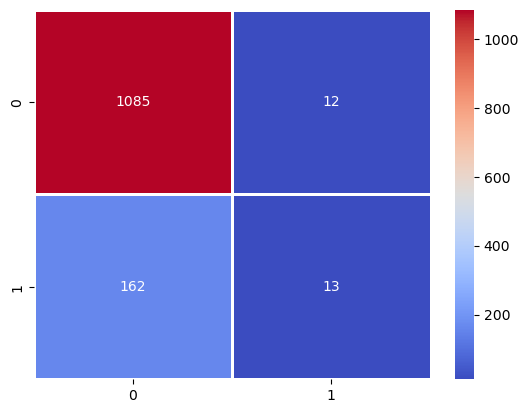

In [47]:
sns.heatmap(df_matrix,cmap='coolwarm',annot=True,linewidths=1,fmt='d')

In [48]:
# Measure the model performance of all the predictions made

logistic_regression_accuracy = accuracy_score(y_test,predictions)
print(logistic_regression_accuracy)

0.8632075471698113


    It is a measure of correctness that is achieved in true prediction.

   - Accuracy = (TP+TN) / (TP+TN+FP+FN) = Correct Predictions / Total Predictions = 86%

.

.

# K Nearest Neighbors Project - Solution

Let's now make classifications, predictions with kNN algorithm and comparison with the above model, Logistic Regression.

- Let's first Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
# StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.
# Unit variance means dividing all the values by the standard deviation.

#Create an instance of StandardScaler

scaler = StandardScaler() 

In [51]:
# Fit the scaler to your data (calculate mean and standard deviation)
scaler.fit(df.drop('TenYearCHD',axis=1))

StandardScaler()

In [52]:
scaled_features = scaler.transform(df.drop('TenYearCHD',axis=1)) # I transform only the columns i want (X), except the column
                                                                 # that i want to predict

In [53]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.153192,-1.234951,1.982068,-0.988271,-0.755376,-0.174741,-0.077033,-0.671101,-0.162477,-0.935776,-1.195907,-1.082625,0.286299,0.342704,-0.207320
1,-0.867158,-0.418257,0.020644,-0.988271,-0.755376,-0.174741,-0.077033,-0.671101,-0.162477,0.297822,-0.515187,-0.158988,0.717711,1.590087,-0.249062
2,1.153192,-0.184916,-0.960068,1.011868,0.922662,-0.174741,-0.077033,-0.671101,-0.162477,0.185677,-0.220209,-0.242955,-0.113247,-0.073090,-0.499512
3,-0.867158,1.331800,1.001356,1.011868,1.761681,-0.174741,-0.077033,1.490089,-0.162477,-0.262904,0.800871,1.016549,0.680943,-0.904679,0.877962
4,-0.867158,-0.418257,1.001356,1.011868,1.174368,-0.174741,-0.077033,-0.671101,-0.162477,1.082840,-0.106755,0.092912,-0.662317,0.758498,0.126613


.

Now we will split our data in train and test set.

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
#Split the model in train and test set
X_train2, X_test2, y_train2, y_test2 = train_test_split(scaled_features, 
                                                    df['TenYearCHD'], 
                                                    test_size=0.3, 
                                                    random_state=42)

# kNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer

In [57]:
# Perform kNN imputation on the training and testing sets. 
# We do that because we have got Null values and we don't want to fill them and run the algorithms in the dataset
# as it is

imputer = KNNImputer(n_neighbors=1)
X_train_imputed2 = imputer.fit_transform(X_train2)
X_test_imputed2 = imputer.transform(X_test2)

In [58]:
# Initialize and train the kNN classifier.
# We will start with k = 1

knn = KNeighborsClassifier(n_neighbors=1)

In [59]:
#Fit our Model

knn.fit(X_train_imputed2,y_train2) 

KNeighborsClassifier(n_neighbors=1)

In [60]:
pred = knn.predict(X_test_imputed2)

Predictions and Evaluations

In [61]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [62]:
print(confusion_matrix(y_test2,pred))  # Print confusion matrix to define the performance of a classification algorithm

[[942 142]
 [147  41]]


In [63]:
print(classification_report(y_test2,pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1084
           1       0.22      0.22      0.22       188

    accuracy                           0.77      1272
   macro avg       0.54      0.54      0.54      1272
weighted avg       0.77      0.77      0.77      1272



In [64]:
# Measure the model performance of all the predictions made

print(accuracy_score(y_test2,pred))

0.7727987421383647


# Let's see if we can pick a good value for k, using elbow method

In [65]:
# use the elbow method to pick a good K Value
import numpy as np

error_rate = []


for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_imputed2,y_train2)
    pred_i = knn.predict(X_test_imputed2)
    error_rate.append(np.mean(pred_i != y_test2))

Text(0, 0.5, 'Error Rate')

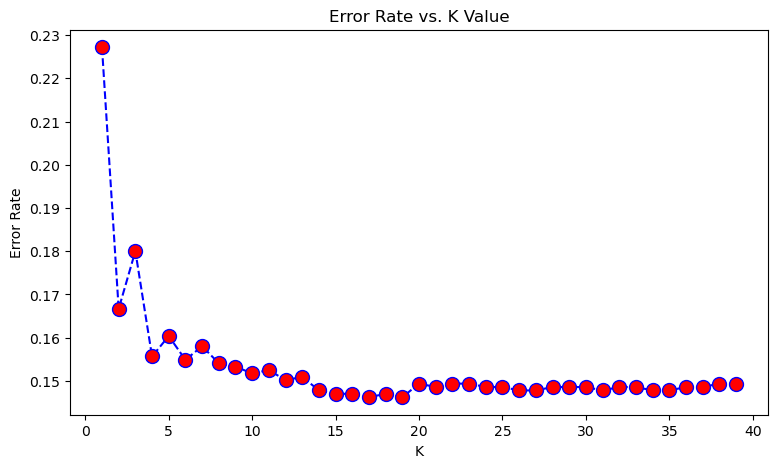

In [66]:
# Plot error rate vs k 
plt.figure(figsize=(9,5))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after k>14 the error rate just tends to hover around 0.15-0.08.
Let's retrain the model with lowest k values, and check the classification report!

In [67]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_imputed2,y_train2)
pred = knn.predict(X_test_imputed2)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test2,pred))
print('\n')
print(classification_report(y_test2,pred))
print('\n')
print(accuracy_score(y_test2,pred))

WITH K=1


[[942 142]
 [147  41]]


              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1084
           1       0.22      0.22      0.22       188

    accuracy                           0.77      1272
   macro avg       0.54      0.54      0.54      1272
weighted avg       0.77      0.77      0.77      1272



0.7727987421383647


In [75]:
#Now for k = 19 (for k =17 we got the same results)
knn = KNeighborsClassifier(n_neighbors=19)

knn.fit(X_train_imputed2,y_train2)
pred = knn.predict(X_test_imputed2)

print('WITH K=19')
print('\n')
print(confusion_matrix(y_test2,pred))
print('\n')
print(classification_report(y_test2,pred))
print('\n')
knn_accuracy = accuracy_score(y_test2,pred)
print(knn_accuracy)

WITH K=19


[[1079    5]
 [ 181    7]]


              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1084
           1       0.58      0.04      0.07       188

    accuracy                           0.85      1272
   macro avg       0.72      0.52      0.50      1272
weighted avg       0.82      0.85      0.79      1272



0.8537735849056604


For k = 19 and for k = 17, the Final kNN Accuracy it's the same.

.

# So we can see the Final predictions from Logistic Regression and kNN algorithm

In [76]:
print('Accuracy Score for kNN algorithm (k=19) = ', knn_accuracy)
print('\n')
print('Accuracy Score for Logistic Regression =', logistic_regression_accuracy)

Accuracy Score for kNN algorithm (k=19) =  0.8537735849056604


Accuracy Score for Logistic Regression = 0.8632075471698113


.

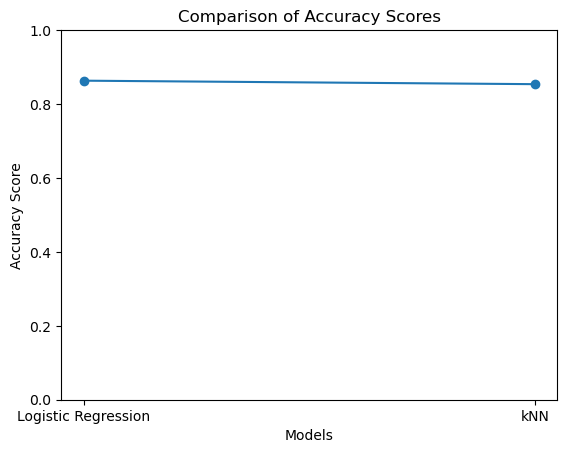

In [77]:
# Plot the comparison of Accuracy scores
accuracy_scores = [logistic_regression_accuracy, knn_accuracy]
models = ['Logistic Regression', 'kNN']

plt.plot(models, accuracy_scores, marker='o')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy Scores')
plt.ylim(0, 1.0)  # Set the y-axis limits between 0 and 1
plt.show()

.

.

So we can see from the two final results that logistic regression has a better prediction rate than kNN, in the specific dataset

.

.

.

# Measuring algorithm execution times by growing the dataset

We will import again the same dataset, in different Dataframe, and Duplicate the Dataset by 30 times

In [79]:
dataset = pd.read_csv("dataset.csv")

In [80]:
bigdata = pd.concat([dataset] * 30, ignore_index=True)

In [81]:
#The bigdata variable, now contains the original dataset repeated 30 times.
bigdata.shape  

(127140, 16)

In [82]:
# To measure the execution time for the two algorithms (logistic regression and kNN), 
# we will use the 'time' module in Python.
import time

In [83]:
# And now in the same way that we ran the algorithms above, 
# this is how we will do and now, we will simply count the time as well.

In [57]:
# Logistic Regression Model #
# y is the value we want to make the prediction
start_time = time.time()
X2 = bigdata.drop('TenYearCHD',axis=1)
y2 = bigdata['TenYearCHD']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=101) 
X2_train_imputed = imputer.fit_transform(X2_train)
X2_test_imputed = imputer.transform(X2_test)
log2 = LogisticRegression(max_iter=1000,solver='liblinear') 

# Execution time
#start_time = time.time()
log.fit(X2_train_imputed,y2_train)
end_time = time.time()

log_reg_time = end_time - start_time

In [59]:
# kNN Algorithm #
start_time2 = time.time()
scaler2 = StandardScaler() 
scaler2.fit(bigdata.drop('TenYearCHD',axis=1))

scaled_features2 = scaler2.transform(bigdata.drop('TenYearCHD',axis=1)) 
bigdata_feat = pd.DataFrame(scaled_features2,columns=bigdata.columns[:-1])

X2_train2, X2_test2, y2_train2, y2_test2 = train_test_split(scaled_features2, 
                                                    bigdata['TenYearCHD'], 
                                                    test_size=0.3, 
                                                    random_state=42)
imputer2 = KNNImputer(n_neighbors=1)
X2_train_imputed2 = imputer2.fit_transform(X2_train2)
X2_test_imputed2 = imputer2.transform(X2_test2)

# kNN
knn2 = KNeighborsClassifier(n_neighbors=1)

# Execute Time
#start_time = time.time()
knn2.fit(X2_train_imputed2,y2_train2) 
end_time2 = time.time()

knn_time = end_time2 - start_time2

In [60]:
# Print the execution times
print("Logistic Regression Time:", log_reg_time)
print("kNN Time:", knn_time)

Logistic Regression Time: 175.0696198940277
kNN Time: 173.66072177886963


As we can see both algorithms take the same time to complete, about 3 minutes. 

With a few seconds faster kNN from Logistic Regression algorithm.

But the difference is minimal where it doesn't give us any engine of choice due to speed.

.

.

# Any help or source for codes and methodologies, i needed, i used:              
- Articles from Medium site
- Stack Overflow 
- Udemy Course ''Python for Data Science and Machine Learning Bootcamp''.